[![Abra no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffserro/MVP/blob/master/mvp.ipynb)


# Regressão Linear para Series Temporais - Planejamento dos dispêndios de alimentação de militares da Marinha do Brasil

## Definição do Problema



<div align="justify">

### O que é o municiamento?
A Gestoria de Munciamento é o conjunto dos processos responsáveis por gerir diariamente a alimentação e subsistência dos militares e servidores lotados nas organizações militares da Marinha do Brasil.

As principais atividades da gestoria de municiamento são:
- Planejamento e aquisição de gêneros alimentícios
- Controle de estoque de gêneros alimentícios
- Escrituração e pagamento
- Prestação de contas


### Orçamento público e alimentação de militares
Por ser custeada com recursos do orçamento da União, a gestoria de municiamento se submete a um sistema rigoroso de planejamento, controle, fiscalização e transparência, para garantir que os valores sejam utilizados de forma eficiente, econômica e legal.

A compra de gêneros alimentícios é uma despesa recorrente e significativa. Uma gestão eficiente garante que os recursos financeiros sejam alocados de forma inteligente, evitando gastos desnecessários.

Uma boa gestão de estoques minimiza desperdícios de alimentos por validade ou má conservação.

Como em qualquer gasto público, a aquisição de suprimentos deve ser transparente e seguir todas as normas de controle, visando a economia e a responsabilidade fiscal.

O planejamento eficiente dos recursos logísticos é um dos pilares para a manutenção da prontidão e da capacidade operacional das Forças Armadas. Entre os diversos insumos estratégicos, a alimentação das organizações militares desempenha papel central, tanto no aspecto orçamentário quanto no suporte direto às atividades diárias. Na Marinha do Brasil, a gestão dos estoques e dos gastos com gêneros alimentícios envolve múltiplos órgãos e abrange um volume expressivo de transações financeiras e contábeis, tornando-se um processo complexo e suscetível a variações sazonais, econômicas e administrativas.

Neste cenário, prever com maior precisão os custos relacionados ao consumo de alimentos é fundamental para otimizar a alocação de recursos públicos, reduzir desperdícios, evitar rupturas de estoque e aumentar a eficiência do planejamento orçamentário. Tradicionalmente, esse processo é conduzido por meio de análises históricas e técnicas de planejamento administrativo. No entanto, tais abordagens muitas vezes não capturam adequadamente os padrões temporais e as variáveis externas que influenciam os gastos.

A ciência de dados, e em particular as técnicas de modelagem de séries temporais, surge como uma alternativa poderosa para aprimorar esse processo decisório. Modelos como SARIMA, Prophet, XGBoost e LSTM permitem identificar tendências, sazonalidades e anomalias nos dados, possibilitando não apenas previsões mais robustas, mas também a geração de insights que subsidiam políticas de abastecimento e aquisição.

Assim, o presente trabalho propõe a aplicação de técnicas de análise e previsão de séries temporais sobre os dados históricos de consumo de alimentos da Marinha do Brasil, com o objetivo de estimar os custos futuros e explorar padrões relevantes que possam apoiar o processo de gestão logística e orçamentária. A relevância deste estudo reside não apenas no ganho potencial de eficiência administrativa, mas também na contribuição para a transparência, a racionalização do gasto público e a modernização da gestão de suprimentos em instituições estratégicas para o país.

## Glossário


* Municiamento
* Rancho
* Etapa
* Comensal
* Série Temporal
* Tendência
* Sazonalidade
* Estacionariedade


## Modelagem

<div align="justify">

 O conjunto de dados que será apresentado traz informações sobre despesas mensais com alimentação de militares e servidores de grandes organizações.

 O balanço de paiol do mês anterior nos traz a informação valor total dos gêneros alimentícios armazenados na organização no último dia do mês anterior.

 Os gêneros podem ser adquiridos pelas organizações de quatro formas diferentes:
 - adquirindo os gêneros dos depósitos de subsistência da Marinha
 - adquirindo os gêneros através de listas de fornecimento de gêneros, que são licitações centralizadas realizadas para atender toda a Marinha
 - adquirindo os gêneros através da realização de licitações próprias
 - adquirindo os gêneros através de contratação direta, sem licitação

 As organizações podem transferir gêneros entre seus estoques, através da realização de remessas. Os gêneros são contabilizados então no paiol através de remessas recebidas e remesas expedidas.

 Os gêneros consumidos durante as refeições do dia (café da manhã, almoço, janta e ceia) são contabilizados como gêneros consumidos.

 Os gêneros consumidos fora das refeições, como o biscoito, café e açúcar que são consumidos durante o dia, são contabilizados como vales-extra.

 As eventuais perdas de estoque são contabilizadas como termos de despesa.

 Quanto às receitas, cada comensal lotado na organização autoriza um determinado valor despesa por dia. A soma dessa despesa autorizada no mês é o valor limite dos gêneros que poderão ser retirados do paiol.

 A modelagem para os dispêndios com gêneros alimentícios considera as seguintes variáveis:
 - a quantidade de pessoas às quais é oferecida alimentação
 - o custo dos alimentos em paiol
 - a composição do cardápio (englobando o perfil de consumo de cada organização)

 Assim, o gasto mensal $Y_m$ de determinada organização no mês $m$ pode ser expresso em termos de:
 - Efetivo atendido ($N_m$)
 - Custo de aquisição dos insumos ($P_m$)
 - Composição do cardápio e perfil de consumo ($C_m$)

 Ou seja, $Y_m = f(N_m, P_m, C_m)\ +\ ϵ_m$

 sendo que o gasto mensal $Y_m$ é o somatório dos gastos diários $Y_d$, expressos por:

\begin{align}
\mathbf{Y_d} = \sum_{i=1}^q \ N_i \cdot p_i\\ \mathbf{Y_m} = \sum_{i=1}^{30} Y_{di}
\end{align}

A equação apresentada mostra que o gasto mensal é resultado da interação entre o número de comensais atendidos, os preços dos gêneros alimentícios e a composição do cardápio de cada organização. O termo de erro $ϵ_m$ representa variações não explicadas diretamente pelas variáveis observadas, como oscilações sazonais de consumo, eventos extraordinários (como cerimônias ou exercícios operativos) ou perdas não previstas.

Dessa forma, o problema de previsão de despesas com gêneros alimentícios pode ser tratado como um problema de série temporal multivariada, em que o objetivo é estimar $Y_m$ com base no histórico de consumo e nas variáveis explicativas ($N_m$, $P_m$, $C_m$). Essa abordagem permite capturar tanto os efeitos de tendência (crescimento ou redução do efetivo ao longo do tempo), quanto os efeitos sazonais (variações periódicas relacionadas ao calendário ou a práticas alimentares específicas), além de fatores idiossincráticos de cada organização.

A correta modelagem desse problema fornece subsídios para o planejamento orçamentário, contribuindo para uma alocação mais eficiente dos recursos destinados ao municiamento, evitando tanto faltas quanto execessos que comprometam a gestão financeira e logística da alimentação dos militares e servidores.
</div>

## Trabalho

In [222]:
#@title Downloads necessários

# SE é a primeira vez que esta célula está sendo executada na sessão ENTÃO baixe os arquivos hospedados no github E instale as dependências do projeto.
![ ! -f '/content/pip_log.txt' ] && git clone 'https://github.com/ffserro/MVP.git' && pip uninstall torchvision torch torchaudio -y > '/content/pip_log.txt' && pip install -r '/content/MVP/requirements.txt' > '/content/pip_log.txt'

In [223]:
#@title Import de bibliotecas

# ============================================================
# Utilitários do sistema e manipulação de arquivos/datas
# ============================================================

from glob import glob                                         # Seleção de múltiplos arquivos via padrões (ex.: *.csv)
from datetime import datetime as dt, timedelta as td          # Manipulação de datas e intervalos de tempo
import matplotlib.dates as mdates                             # Manipulação de datas dos eixos dos gráficos
import itertools                                              # Criação de combinações e iterações eficientes

# ============================================================
# Manipulação numérica e de dados
# ============================================================

import pandas as pd                                           # Estruturas de dados tabulares (DataFrames)
import numpy as np                                            # Computação numérica de alta performance (arrays/vetores)

# ============================================================
# Visualização de dados
# ============================================================

import matplotlib.pyplot as plt                               # Visualizações estáticas básicas (gráficos 2D)
import seaborn as sns                                         # Visualizações estatísticas de alto nível (heatmaps, distribuições)
import plotly.express as px                                   # Visualizações interativas de alto nível
import plotly.graph_objects as go                             # Visualizações interativas detalhadas e customizáveis

# ============================================================
# Ferramentas estatísticas para séries temporais
# ============================================================

import statsmodels.api as sm                                  # Modelos estatísticos gerais
from statsmodels.tsa.stattools import adfuller                # Teste ADF (estacionariedade)
from statsmodels.tsa.seasonal import seasonal_decompose       # Decomposição de série (tendência/sazonalidade)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Autocorrelação e autocorrelação parcial

# ============================================================
# Modelos clássicos de séries temporais (baseline)
# ============================================================

from statsmodels.tsa.statespace.sarimax import SARIMAX        # Modelo SARIMA/SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Suavização exponencial de Holt-Winters

# ============================================================
# Preparação e avaliação de dados
# ============================================================

from sklearn.model_selection import TimeSeriesSplit           # Validação cruzada para séries temporais
from sklearn.preprocessing import MinMaxScaler                # Normalização (0–1) para redes neurais e ML
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error  # Métricas de avaliação (MAE, R2, RMSE)

# ============================================================
# Modelos modernos de previsão
# ============================================================

from prophet import Prophet                                   # Modelo Prophet (captura tendência + sazonalidade)
from xgboost import XGBRegressor                              # Modelo baseado em boosting (árvores de decisão)

# Redes neurais (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential                # Estrutura sequencial de camadas
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout # Camadas para deep learning
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # Callbacks para treinamento robusto

# Modelos baseados em deep learning específicos de séries temporais
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS                      # Arquitetura N-BEATS (estado da arte em forecasting)

# AutoML para séries temporais
from autogluon.timeseries import TimeSeriesPredictor          # AutoGluon (seleção automática de modelos)

# ============================================================
# Configurações gerais
# ============================================================

from warnings import filterwarnings
filterwarnings('ignore')                                      # Silencia warnings para manter a saída do notebook limpa

In [224]:
#@title Leitura dos dados brutos

# ============================================================
# Leitura e consolidação dos dados brutos
# ============================================================

mmm = pd.DataFrame()                                            # cria um DataFrame vazio para armazenar os dados
mmm = pd.concat(                                                # carrega todos os arquivos de movimentação mensal (mmm) em um único DataFrame.
    [mmm] + [
        pd.read_excel(arquivo, parse_dates=[['ano', 'mes']])    # parse_dates=[['ano', 'mes']] combina as colunas 'ano' e 'mes' em um único campo datetime
        for arquivo in glob('/content/MVP/dados/mmm/*.xlsx')    # glob encontra todos os arquivos .xlsx dentro da pasta de dados
    ],
    ignore_index=True
)



etapas = pd.DataFrame()
etapas = pd.concat(                                              # carrega todos os arquivos de etapas em um único DataFrame.
    [etapas] + [
        pd.read_excel(arquivo, parse_dates=[['ano', 'mes']])     # estrutura e lógica de leitura iguais ao dataset acima
        for arquivo in glob('/content/MVP/dados/etapas/*.xlsx')
    ],
    ignore_index=True
)


centralizadas = pd.read_csv('/content/MVP/dados/om_centralizada.csv') # carrega as informações das organizações militares centralizadas e suas respectivas centralizadoras


om_info = pd.read_csv('/content/MVP/dados/om_info.csv')           # carrega informações complementares sobre as organizações militares


### Preparação dos dados

#### Limpeza do conjunto de dados sobre os Mapas Mensais do Municiamento de 2019 a 2025

In [225]:
# Existem organizações que não possuem dados para todo o período analisado
mmm.groupby('nome').ano_mes.count().sort_values(ascending=False)

,ano_mes
nome,
1° BATALHAO DE OPERAÇOES LITORANEAS DE FUZILEIROS NAVAIS,80
1º Batalhão de Operações Ribeirinhas,80
2° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEIROS NAVAIS,80
3° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEIROS NAVAIS,80
BASE DE ABASTECIMENTO DA MARINHA NO RIO DE JANEIRO,80
...,...
TREINA31,2
TREINA34,2
Aviso de Apoio Costeiro Almirante Hess,1


In [226]:

# Ao todo o conjunto de dados contempla 80 meses. Como será realizada uma análise de série temporal, vou considerar apenas as organizações que possuem dados para todo o período.
mmm = mmm[mmm.codigo.isin(mmm.codigo.value_counts()[mmm.codigo.value_counts() == 80].index)]

In [227]:
mmm = mmm[mmm.ano_mes < dt(2025, 7, 1)] # removendo os dados dos últimos meses. Não são confiáveis porque as comprovações ainda não tinham sido completamente consolidadas a época da coleta de dados.

#### Limpeza do conjunto de dados sobre informações das OM

In [228]:
# Verificando a existência de dados faltosos
(om_info.isna().sum()/len(om_info)).sort_values(ascending=False)

,0
COMIMSUP,1.000000
ODS,0.500907
TELEFONE,0.377495
BAIRRO,0.183303
CEP,0.147005
ENDERECO,0.136116
UF,0.136116
CIDADE,0.125227
CNPJ,0.030853
AREA_ID,0.014519


In [229]:
# Quantidade de entradas diferentes para cada coluna no conjunto de dados
om_info.nunique()

,0
DN_ID,9
AREA_ID,10
ID,551
CODIGO,550
NOME,550
TIPO,7
INDICATIVO_NAVAL,499
SIGLA,550
COMIMSUP,0
ODS,17


In [230]:
# Informações que não vao agregar conhecimento para o caso em tela, por serem nulos ou por conter informações irrelevantes
om_info.drop(columns=['COMIMSUP', 'CNPJ', 'TELEFONE', 'ODS', 'TIPO_CONEXAO', 'CRIACAO', 'MODIFICACAO'], inplace=True)

In [231]:
om_info[['DN_ID', 'SUB_DN_ID', 'AREA_ID', 'COD_SQ_LOCAL', 'NOME', 'CIDADE']].sort_values(by=['DN_ID', 'SUB_DN_ID', 'AREA_ID', 'COD_SQ_LOCAL'])

,DN_ID,SUB_DN_ID,AREA_ID,COD_SQ_LOCAL,NOME,CIDADE
71,1.0,1.0,2.0,0.0,CENTRO DE APOIO A SISTEMAS LOGÍSTICOS DE DEFESA,RIO DE JANEIRO
413,1.0,1.0,2.0,2.0,NAVIO-PATRULHA GUAÍBA,NATAL
163,1.0,1.0,2.0,3.0,SUBMARINO TAMOIO,RIO DE JANEIRO
311,1.0,1.0,2.0,9.0,NAVIO-PATRULHA GUARATUBA,Salvador
168,1.0,1.0,2.0,12.0,COMANDO DA DIVISÃO RIBEIRINHA,DUQUE DE CAXIAS
...,...,...,...,...,...,...
321,9.0,36.0,30.0,409.0,POLICLÍNICA NAVAL DE MANAUS,MANAUS
332,9.0,36.0,30.0,711.0,NAVIO DE ASSISTÊNCIA HOSPITALAR SOARES DE MEIR...,MANAUS
345,NaN,NaN,NaN,1.0,ADIDO DE DEFESA E NAVAL EM PORTUGAL,LISBOA
134,NaN,NaN,NaN,500.0,CENTRO DE INSTRUÇÃO ALMIRANTE GASTÃO MOTTA,NaN


In [232]:
# As colunas SUB_DN_ID, AREA_ID e COD_SQ_LOCAL são pouco ou não descritivas
om_info.drop(columns=['SUB_DN_ID', 'AREA_ID', 'COD_SQ_LOCAL'], inplace=True)

In [233]:
om_info.sort_values(by='TIPO')

,DN_ID,ID,CODIGO,NOME,TIPO,INDICATIVO_NAVAL,SIGLA,ENDERECO,BAIRRO,CIDADE,UF,CEP
19,6.0,10092,86010,1º ESQUADRÃO DE HELICÓPTEROS DE EMPREGO GERAL ...,A,HELIEQ,EsqdHu-61,"RUA 14 DE MARÇO, S/No.",CENTRO,LADÁRIO,MS,79370000
144,9.0,10258,88010,1º ESQUADRÃO DE HELICÓPTEROS DE EMPREGO GERAL ...,A,HELIET,EsqdHU-91,"RUA RIO ITAQUAÍ, S/Nº",VILA BURITI,MANAUS,AM,69072080
11,1.0,10074,91140,1º ESQUADRÃO DE HELICÓPTEROS DE ESCLARECIMENTO...,A,HELITQ,EsqdHA-1,RUA COMANDANTE ITURIEL S/Nº,FLUMINENSE,SÃO PEDRO DA ALDEIA,RJ,28940000
178,1.0,10036,91120,1º ESQUADRÃO DE HELICÓPTEROS DE EMPREGO GERAL,A,HELIEU,EsqdHU-1,"RUA COMANDANTE ITURIEL, S/Nº",FLUMINENSE,SÃO PEDRO DA ALDEIA,RJ,28940000
512,1.0,13879,91170,Grupo Aéreo Naval de Manutenção,A,GANMNT,GAerNavMan,RUA COMANDANTE ITURIEL - S/Nº - - FLUMINENSE -...,Base Aero Naval,São Pedro da Aldeia,RJ,28944-05
...,...,...,...,...,...,...,...,...,...,...,...,...
216,1.0,10391,71260,DEPÓSITO DE FARDAMENTO DA MARINHA NO RIO DE JA...,T,DPFARD,DepFMRJ,"AV.BRASIL, 10500",OLARIA,RIO DE JANEIRO,RJ,21012350
353,1.0,10309,91181,CENTRO DE INTENDÊNCIA DA MARINHA EM SÃO PEDRO ...,T,CITSPA,CeIMSPA,RUA COMANDANTE ITURIEL S/N,FLUMINENSE,S.PEDRO ALDEIA,RJ,28940000
550,1.0,14819,18000,Secretaria Naval de Segurança Nuclear e Qualidade,T,SEGNUC,SecNSNQ,"Rua da Ponte, s/nº, Edifício 23",Centro,Rio de Janeiro,RJ,20091000
335,NaN,99999,99999,Outros motivos autorizados pela DFM,NaN,OUTROS,OUTROS,NaN,NaN,NaN,NaN,NaN


In [234]:
# A variável TIPO começa descrevendo os tipo de organizações, como A para bases aeronavais, B para bases, F para fuzileiros navais, N para navios, S para saúde e I para instrução. Porém o T entra em uma categoria geral como se em algum momento essa vaiável deixou de ser utilizada.
# Então se tornou pouco descritiva para os nossos objetivos
om_info.drop(columns=['TIPO'], inplace=True)

In [235]:
# observações com dados faltosos
om_info.loc[om_info.isna().sum(axis=1) != 0]

,DN_ID,ID,CODIGO,NOME,INDICATIVO_NAVAL,SIGLA,ENDERECO,BAIRRO,CIDADE,UF,CEP
1,1.0,10039,91622,FRAGATA DODSWORTH,FDODSW,FDODSWORTH,NaN,NaN,NaN,NaN,NaN
2,7.0,10043,10000,COMANDANTE DA MARINHA,COMMAR,CM,ESPLANADA DOS MINISTERIOS - BLOCO N - 2o e 3o ...,NaN,BRASÍLIA,DF,70055900
10,6.0,10066,86100,COMANDO DA FLOTILHA DE MATO GROSSO,FLTMGS,ComFlotMT,RUA 14 DE MARCO S/Nr.,NaN,LADÁRIO,MS,79370000
34,4.0,10130,88318,AGÊNCIA FLUVIAL DE BOCA DO ACRE,AGACRE,AGBACRE,"AV. QUINZE DE NOVEMBRO, 2221",NaN,BOCA DO ACRE,AC,69850000
37,7.0,10136,70100,COMISSÃO NAVAL BRASILEIRA NA EUROPA,NAVEUR,CNBE,"170, UPPER RICHMOND ROAD - PUTNEY -LONDON - SW...",NaN,LONDRES,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
535,1.0,12701,11119,TREINA19,TREINA,TREINA19,NaN,NaN,NaN,NaN,NaN
536,1.0,12702,11120,TREINA20,TREINA,TREINA20,NaN,NaN,NaN,NaN,NaN
542,1.0,14419,91674,Embarcação de Desembarque de Carga Geral Camboriú,EDCGIU,EDCGCamboriu,"Ilha de Mocanguê, S/N",Ponta D'Areia,Niterói,RJ,NaN
544,1.0,14499,20320,CENTRO DE PROJETOS DE SISTEMAS NAVAIS,CPSNAV,CPSN,Ilha da Madeira,NaN,Itaguai,RJ,NaN


In [236]:
# Preenchendo manualmente os dados faltosos com informações da internet
om_info.loc[om_info.CODIGO==87310, 'BAIRRO'] = 'Plano Diretor Sul'
om_info.loc[om_info.CODIGO==87700, 'BAIRRO'] = 'Asa Sul'

#### Limpeza de dados do conjunto de dados sobre centralização do municiamento

In [237]:
# Primeira transformação a ser feita será padronizar a codificação das organizações por UASG
centralizadas['OM_CENTRALIZADA_ID'] = centralizadas.OM_CENTRALIZADA_ID.map(om_info.set_index('ID').CODIGO)
centralizadas['OM_CENTRALIZADORA_ID'] = centralizadas.OM_CENTRALIZADORA_ID.map(om_info.set_index('ID').CODIGO)

In [238]:
# Mais uma vez, eu só preciso das informações das organizações que estão presentes no conjunto de dados do Mapa Mensal do Municiamento
centralizadas = centralizadas[centralizadas.OM_CENTRALIZADORA_ID.isin(mmm.codigo.unique())]

In [239]:
# Drop de colunas pouco informativas para o problema em tela
centralizadas.drop(columns=['CONTATO', 'TELEFONE', 'CRIACAO', 'MODIFICACAO', 'GESTORIA_ID'], inplace=True)

In [240]:
# Remover do conjunto de dados as movimentações que aconteceram antes do período observado
centralizadas = centralizadas[~(pd.to_datetime(centralizadas.DATA_FIM) < dt(2019, 1, 1))]

In [241]:
# Verificação manual da coerência dos períodos municiados
centralizadas.groupby('OM_CENTRALIZADA_ID').filter(lambda x: len(x)> 1).sort_values(by=['OM_CENTRALIZADA_ID', 'DATA_INICIO'])

,OM_CENTRALIZADA_ID,OM_CENTRALIZADORA_ID,TIPO_CENTRALIZACAO_ID,DATA_INICIO,DATA_FIM
168,11500,71000,4.0,2011-10-01 00:00:00.000,NaN
565,11500,81000,4.0,2017-10-23 00:00:00.000,NaN
499,41000,91613,1.0,2019-12-06 00:00:00.000,2019-12-31 00:00:00.000
779,41000,62600,1.0,2022-08-01 00:00:00.000,2023-09-30 00:00:00.000
464,49000,71000,4.0,2015-07-01 00:00:00.000,NaN
590,49000,81000,4.0,2018-01-18 00:00:00.000,NaN
144,62000,62000,1.0,2004-01-01 00:00:00.000,NaN
618,62000,81000,4.0,2017-12-16 00:00:00.000,NaN
259,62500,62500,4.0,2002-02-01 00:00:00.000,NaN
623,62500,81000,4.0,2017-12-16 00:00:00.000,NaN


In [242]:
# Definindo algumas datas que as organizações passaram a ser centralizadas por outra centralizadora
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==11500) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==11500) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==49000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==49000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==62000) & (centralizadas.OM_CENTRALIZADORA_ID==62000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==62000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==62500) & (centralizadas.OM_CENTRALIZADORA_ID==62500), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==62500) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==64000) & (centralizadas.OM_CENTRALIZADORA_ID==64000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==64000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==65701) & (centralizadas.OM_CENTRALIZADORA_ID==65701), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==65701) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==65730) & (centralizadas.OM_CENTRALIZADORA_ID==65701), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==65730) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==67000) & (centralizadas.OM_CENTRALIZADORA_ID==62000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==67000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==71000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==71000) & (centralizadas.OM_CENTRALIZADORA_ID==71100), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==71000) & (centralizadas.OM_CENTRALIZADORA_ID==71100), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==71000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==72000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==72000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==73000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==73000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==73200) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==73200) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==76000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==76000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==78000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==78000) & (centralizadas.OM_CENTRALIZADORA_ID==71000), 'DATA_INICIO']
centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==80000) & (centralizadas.OM_CENTRALIZADORA_ID==80000), 'DATA_FIM'] = centralizadas.loc[(centralizadas.OM_CENTRALIZADA_ID==80000) & (centralizadas.OM_CENTRALIZADORA_ID==81000), 'DATA_INICIO']

# Removendo algumas informações que estavam duplicadas
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==62600) & (centralizadas.OM_CENTRALIZADORA_ID==62600) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==87400) & (centralizadas.OM_CENTRALIZADORA_ID==87400) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==88000) & (centralizadas.OM_CENTRALIZADORA_ID==88000) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==88133) & (centralizadas.OM_CENTRALIZADORA_ID==88133) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==88701) & (centralizadas.OM_CENTRALIZADORA_ID==88000) & (centralizadas.DATA_FIM.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==95300) & (centralizadas.OM_CENTRALIZADORA_ID==95380) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==95340) & (centralizadas.OM_CENTRALIZADORA_ID==95380) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==95370) & (centralizadas.OM_CENTRALIZADORA_ID==95380) & (centralizadas.TIPO_CENTRALIZACAO_ID.isna())].index, inplace=True)
centralizadas.drop(index=centralizadas[(centralizadas.OM_CENTRALIZADA_ID==95380) & (centralizadas.OM_CENTRALIZADORA_ID==95380) & (centralizadas.DATA_INICIO==dt(2004, 1, 1))].index, inplace=True)

In [243]:
# Supondo que as relações que não possuem data fim estão em vigor até hoje
centralizadas.DATA_FIM.fillna(dt(2026,1,1), inplace=True)

#### Limpeza do conjunto de dados sobre etapas do municiamento

In [244]:
# Filtro para manter apenas etapas que sejam relevantes dado as organizações contantes do conjunto de dados dos Mapas Mensais do Municiamento
etapas = etapas[etapas.uasg.isin(mmm.codigo.unique())]

In [245]:
# Removendo as etapas de complementos, uma vez que o objetivo da contabilização das etapas é contar o número de pessoas de cada organização
etapas = etapas[~(etapas.codigo_etapa//100==6)]

#### Salvando os dados limpos

In [246]:
mmm.to_csv('/content/MVP/dados/mmm/mmm_limpo.csv', index=False)
om_info.to_csv('/content/MVP/dados/om_info_limpo.csv', index=False)
centralizadas.to_csv('/content/MVP/dados/om_centralizada_limpo.csv', index=False)
etapas.to_csv('/content/MVP/dados/etapas/etapas_limpo.csv', index=False)

#### Exploração

In [247]:
mmm_marinha = mmm.groupby(['ano_mes'])[['totais_balanco_paiol_despesa']].sum().reset_index().rename(columns={'totais_balanco_paiol_despesa':'consumo'})

In [248]:
mmm_marinha = mmm_marinha.iloc[:-2]

In [249]:
mmm_marinha.head()

,ano_mes,consumo
0,2019-01-01,1.181114e+07
1,2019-02-01,1.153618e+07
2,2019-03-01,1.195855e+07
3,2019-04-01,1.270288e+07
4,2019-05-01,1.366815e+07
...,...,...
71,2024-12-01,1.087304e+07
72,2025-01-01,1.299396e+07
73,2025-02-01,1.388008e+07
74,2025-03-01,1.470258e+07


In [250]:
mmm_etapas = pd.merge(left=mmm, right=etapas, how='inner', left_on=['ano_mes', 'codigo'], right_on=['ano_mes', 'uasg'])

In [251]:
# Filtra o dataframe mmm_etapas para incluir apenas os códigos de etapa 103 e 105, que representam diferentes tipos de refeições ou etapas de municiamento.
# Em seguida, seleciona as colunas 'ano_mes', 'nome', 'codigo_etapa' e 'quantidade' para visualização.
mmm_etapas[mmm_etapas.codigo_etapa.isin([103, 105])][['ano_mes', 'nome', 'codigo_etapa', 'quantidade']]

,ano_mes,nome,codigo_etapa,quantidade
1,2023-01-01,1° BATALHAO DE OPERAÇOES LITORANEAS DE FUZILEI...,103,18748.0
4,2023-01-01,1º Batalhão de Operações Ribeirinhas,103,9411.0
6,2023-01-01,2° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEI...,103,4747.0
7,2023-01-01,2° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEI...,105,44.0
9,2023-01-01,3° BATALHÃO DE OPERAÇÕES LITORÂNEAS DE FUZILEI...,103,6273.0
...,...,...,...,...
31806,2025-06-01,SANATORIO NAVAL DE NOVA FRIBURGO,103,2066.0
31810,2025-06-01,SERVIÇO DE SELEÇÃO DO PESSOAL DA MARINHA,103,477.0
31814,2025-06-01,SUBMARINO TUPI,103,619.0
31816,2025-06-01,TRIBUNAL MARÍTIMO,103,480.0


### Verificações

In [252]:
def plota_resultados(title, df=mmm_marinha, x_col='ano_mes', y_col='consumo', preds=None, labels=None):
    '''
    Plota a série temporal original e, opcionalmente, as previsões de um ou mais modelos.

    Args:
        df (pd.DataFrame): DataFrame contendo a série temporal original.
        x_col (str): Nome da coluna do eixo x (geralmente a coluna de data).
        y_col (str): Nome da coluna do eixo y (a variável a ser plotada).
        title (str): Título do gráfico.
        preds (dict, optional): Dicionário onde as chaves são os nomes dos modelos
                                 e os valores são tuplas (x_pred, y_pred) com as
                                 datas e os valores previstos. Defaults to None.
        labels (dict, optional): Dicionário para renomear os rótulos dos eixos
                                 no gráfico. Defaults to {x_col: 'Período', y_col: 'Valor observado'}.
    '''
    # Série real
    fig = px.line(
        df,
        x=x_col,
        y=y_col,
        labels=labels or {x_col: 'Período', y_col: 'Valor observado'},
        title=title
    )

    # Previsões opcionais
    if preds:
        for model_name, (y_pred) in preds.items():
            fig.add_trace(go.Scatter(
                x=df[x_col].iloc[-12:],
                y=y_pred,
                mode='lines+markers',
                name=f'Previsão — {model_name}',
                line=dict(width=2, dash='dash')
            ))

    # Layout padronizado
    fig.update_traces(line=dict(width=2))
    fig.update_xaxes(tickangle=45)
    fig.update_layout(
        template='plotly_white',
        hovermode='x unified'
    )

    return fig

# Gera o plot da série temporal original dos gastos com alimentação
fig = plota_resultados(
title='Gastos com alimentação dos últimos cinco anos'
)

# Exibe o gráfico
fig.show()

In [253]:
def checa_estacionariedade(serie, alpha=0.05):
    '''
    Executa o Teste de Dickey-Fuller Aumentado (ADF) para verificar
    se uma série temporal é estacionária.

    Parâmetros
    ----------
    serie : pd.Series
        Série temporal a ser testada.
    alpha : float, default=0.05
        Nível de significância para o teste de hipótese.

    Interpretação
    -------------
    H0 (hipótese nula): a série possui raiz unitária (não estacionária).
    H1 (alternativa): a série é estacionária.
    '''

    resultado = adfuller(serie.dropna())                        # remove valores nulos antes do teste

    estatistica_adf = resultado[0]                              # extrai estatísticas relevantes
    p_valor = resultado[1]
    num_lags = resultado[2]                                     # número de lags usados no modelo
    num_obs = resultado[3]                                      # número de observações utilizadas

    print(f'Estatística ADF: {estatistica_adf:.4f}')            # exibição dos principais resultados
    print(f'p-valor: {p_valor:.4f}')
    print(f'Nº lags utilizados: {num_lags}')
    print(f'Nº observações: {num_obs}')
    print('Valores críticos:', resultado[4])                    # níveis de significância (1%, 5%, 10%)


    if p_valor < alpha:                                         # avaliação da hipótese nula
        print('Série estacionária (rejeita H0 de raiz unitária).')
    else:
        print('Série não estacionária (não rejeita H0).')

# ============================================================
# Verificação da estacionariedade da série de consumo
# ============================================================

checa_estacionariedade(mmm_marinha['consumo'])

Estatística ADF: -1.2472
p-valor: 0.6530
Nº lags utilizados: 12
Nº observações: 63
Valores críticos: {'1%': np.float64(-3.5386953618719676), '5%': np.float64(-2.9086446751210775), '10%': np.float64(-2.591896782564878)}
Série não estacionária (não rejeita H0).


<div align="justify">

Uma série temporal é considerada não estacionária quando suas propriedades estatísticas, como média, variância e covariância, mudam ao longo do tempo. Isso significa que a série apresenta tendência, sazonalidade ou mudanças estruturais que tornam seu comportamento instável e imprevisível se analisado diretamente. Em outras palavras, os padrões da série não são constantes, o que dificulta a modelagem e a previsão sem antes aplicar técnicas de transformação, como diferenciação ou remoção de tendência.

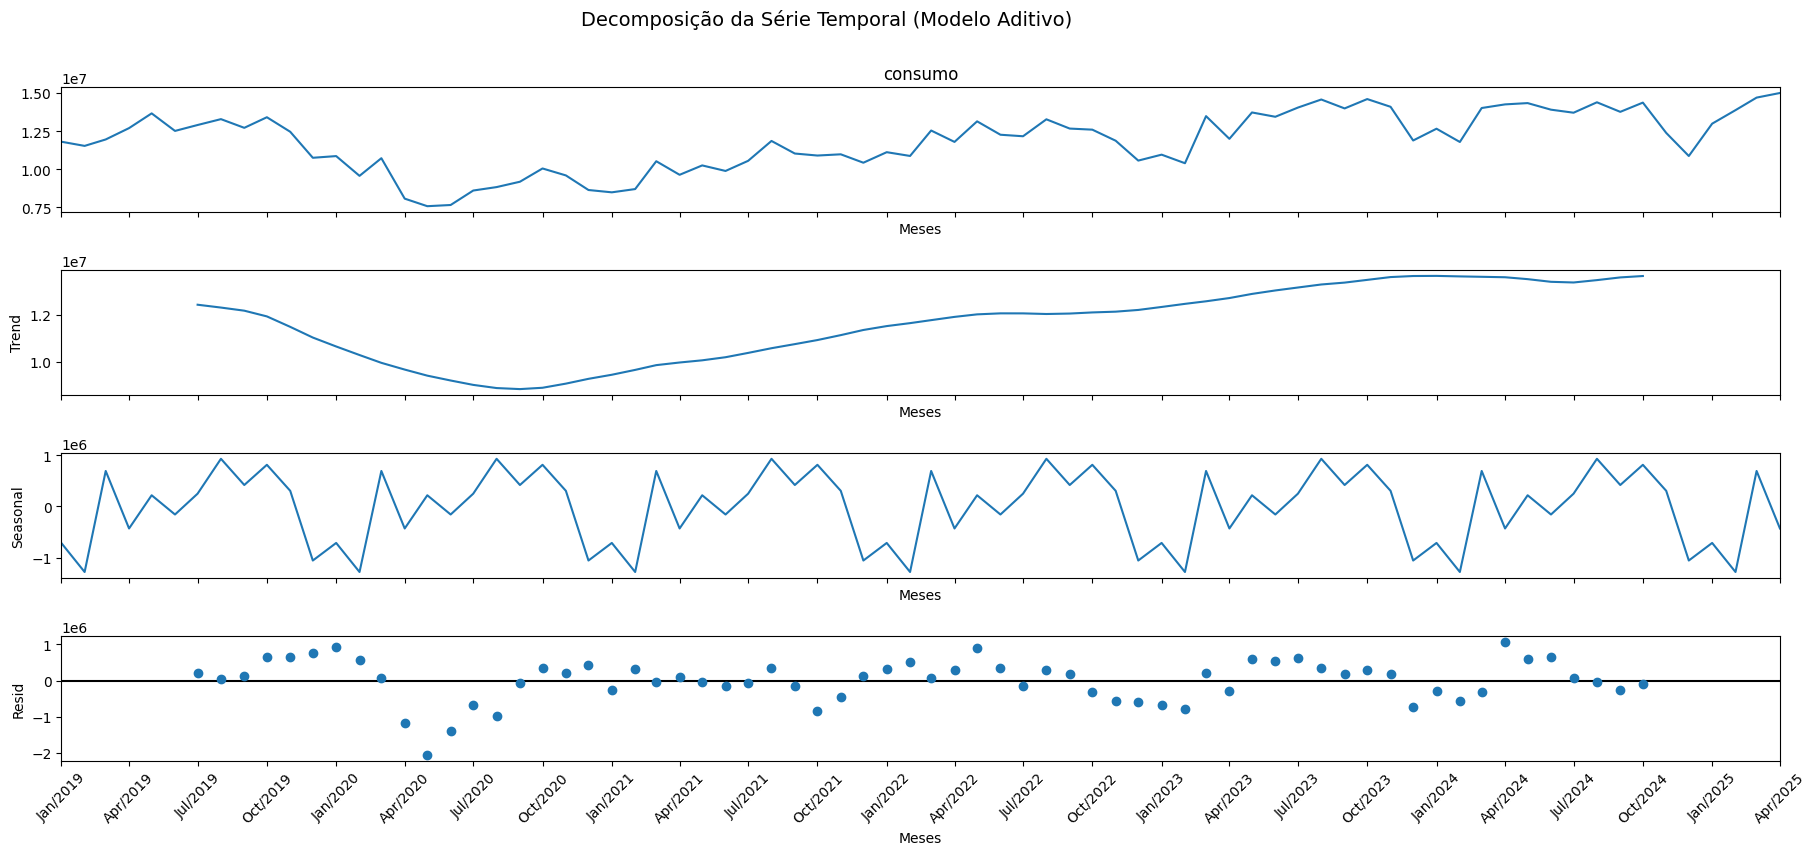

In [254]:
# ============================================================
# Decomposição da série temporal em tendência, sazonalidade e resíduos
# ============================================================

decomp = seasonal_decompose(
    mmm_marinha.set_index('ano_mes')['consumo'],                # consumo = tendência + sazonalidade + resíduo
    model='additive',                                           # aplica decomposição aditiva
    period=12                                                   # período de sazonalidade anual assume a mensalidade em 12 meses.
)

# Gera visualização dos componentes:
# Série observada
# Tendência (variação de longo prazo)
# Sazonalidade (padrões que se repetem periodicamente)
# Resíduos (parte não explicada pelo modelo)
fig = decomp.plot()
fig.set_size_inches(20, 8)

for ax in fig.axes:
    ax.set_xlabel("Meses")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(
        plt.matplotlib.dates.DateFormatter("%b/%Y")             # formato "Mes/Ano"
    )
    ax.tick_params(axis="x", rotation=45)

plt.suptitle("Decomposição da Série Temporal (Modelo Aditivo)", fontsize=14, y=1.02)
plt.show()


<div align="justify">

A decomposição de uma série temporal consiste em separar seus componentes fundamentais para melhor compreensão e análise do comportamento dos dados. Em geral, a série pode ser dividida em três partes: tendência, que representa a direção de longo prazo (se os valores estão crescendo, diminuindo ou se mantendo estáveis ao longo do tempo); sazonalidade, que corresponde a padrões que se repetem em intervalos regulares, como meses ou estações do ano; e resíduos (ou ruído), que englobam as variações aleatórias não explicadas pelos dois primeiros componentes. Essa separação é útil porque permite identificar padrões ocultos, avaliar a previsibilidade da série e escolher modelos de previsão mais adequados.

<div align="justify">

Podemos reparar, após a decomposição da série, que os ruídos seguem oscilando om valores próximos de zero, exceto pelo período de pandemia em meados de 2020, quando os resíduos de afastam mais de zero, devido a queda na confecção de alimentos durante a adoção do isolamento social.

Esse acontecimento aparentemente impactou também no comportamento da tendência, o que pode influenciar bastante as previsões que serão realizadas.

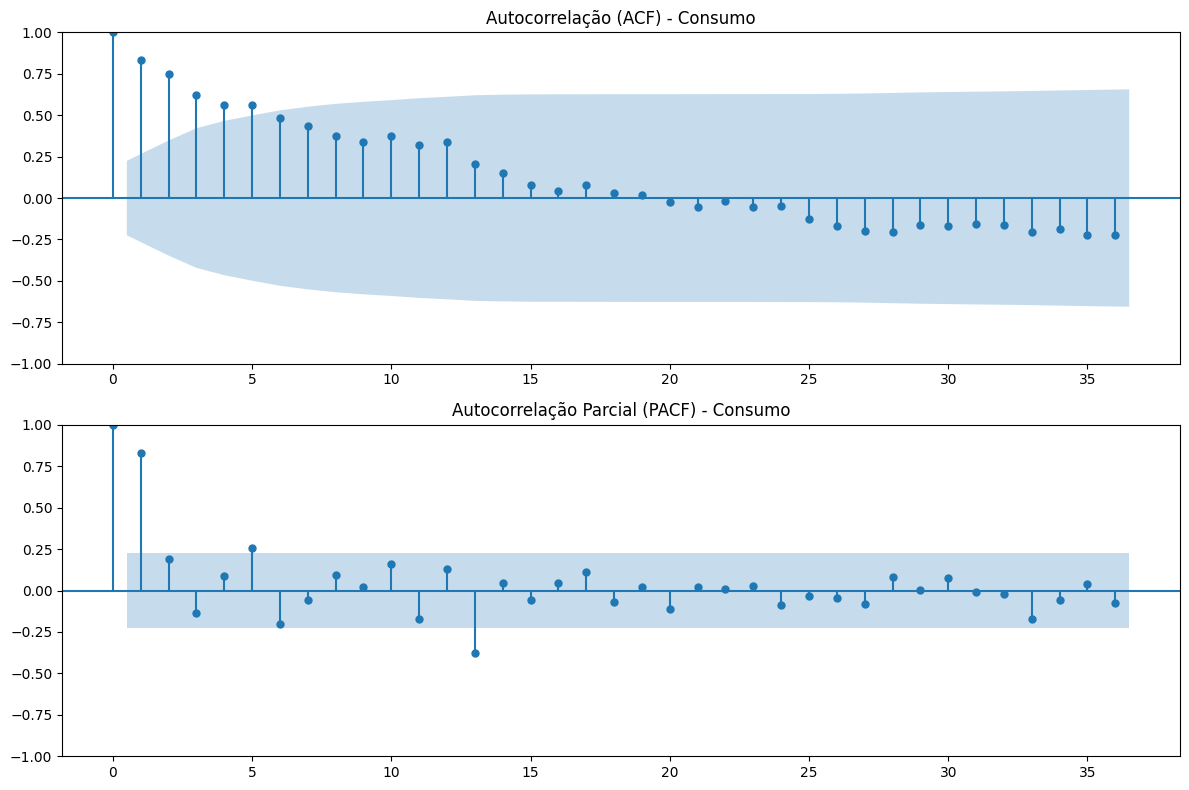

In [282]:
# ============================================================
# Análise de Autocorrelação (ACF) e Autocorrelação Parcial (PACF)
# ============================================================

# Cria figura com dois subplots: um para ACF e outro para PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Autocorrelação (ACF)
# - Mede a correlação da série com suas próprias defasagens
# - Útil para identificar dependência temporal e possíveis lags para ARIMA
plot_acf(
    mmm_marinha['consumo'].dropna(),  # remove NaNs antes do cálculo
    lags=36,                           # número de defasagens a serem exibidas
    ax=ax[0]
)
ax[0].set_title("Autocorrelação (ACF) - Consumo")

# Autocorrelação Parcial (PACF)
# - Mede a correlação da série com uma defasagem específica,
#   removendo efeitos das defasagens intermediárias
# - Ajuda a identificar a ordem AR (p) em modelos ARIMA
plot_pacf(
    mmm_marinha['consumo'].dropna(),
    lags=36,
    ax=ax[1],
    method='ywm'   # método de estimação robusto para PACF
)
ax[1].set_title("Autocorrelação Parcial (PACF) - Consumo")

plt.tight_layout()
plt.show()

A análise de autocorrelação (ACF) e autocorrelação parcial (PACF) são ferramentas fundamentais no estudo de séries temporais, pois ajudam a entender como os valores passados influenciam os valores presentes da série.
A autocorrelação mede a correlação entre a série e suas defasagens (lags), ou seja, verifica se há relação entre um valor e os valores anteriores em diferentes intervalos de tempo. Já a autocorrelação parcial busca identificar essa relação de forma mais “direta”, isolando o efeito das defasagens intermediárias e mostrando a correlação entre um valor e um lag específico sem a influência de outros. Essas análises são especialmente úteis para identificar padrões sazonais e para auxiliar na escolha dos parâmetros de modelos como o ARIMA, onde o ACF e o PACF orientam a definição de termos autorregressivos (AR) e de médias móveis (MA).

Na análise de autocorrelação, os primeiros lags apresentam autocorrelação positiva e significativa, acima do intervalo de confiança, significando que os valores da série estão fortemente relacionados com os valores passados próximos.
O decaimento gradual da autocorrelação confirma a presença de um forte componente de tendência.

Na análise da autocorrelação parcial, o lag 1 é bastante significativo e explica a maior parte da dependência. Há outros picos significativos (lags 5 e 13), mas d emenor intensidade, indicando que pode existir ação de sazonalidade.

### Teste de modelos

In [256]:
train = mmm_marinha.iloc[:-12]
test = mmm_marinha.iloc[-12:]

#### Previsão Naïve (critério de comparação)

In [257]:
# ============================================================
# Previsão Naïve (Baseline)
# ============================================================

# A previsão "naïve" assume que o valor futuro é igual ao último valor observado.
# Aqui usamos shift(1) para criar previsões deslocadas em 1 período.
previsao_naive = mmm_marinha['consumo'].shift(1)

y_pred_naive = previsao_naive[-12:]

mae_naive = mean_absolute_error(mmm_marinha.consumo.iloc[-12:], y_pred_naive)                # erro médio absoluto
rmse_naive = root_mean_squared_error(mmm_marinha.consumo.iloc[-12:], y_pred_naive)           # raiz do erro quadrático médio
r2_naive = r2_score(mmm_marinha.consumo.iloc[-12:], y_pred_naive)                            # coeficiente de determinação

print(f"Previsão Naïve -> MAE: {mae_naive:.2f} | RMSE: {rmse_naive:.2f} | R2: {r2_naive}")


Previsão Naïve -> MAE: 855229.89 | RMSE: 1070452.59 | R2: 0.04206213152672078


In [258]:
fig = plota_resultados(
    title="Previsão temporal — Naïve",
    preds={
        "Naïve": (y_pred_naive)
    }
)
fig.show()

#### Previsão SARIMA (critério de comparação)

In [275]:
# ============================================================
# Definição do espaço de busca
# ============================================================

p = d = q = range(0, 2)                                         # parâmetros do componente ARIMA (p, d, q), assumindo valores de 0 a 2

P = D = Q = range(0, 2)                                         # parâmetros do componente sazonal (P, D, Q, m), assumindo valores de 0 a 1 e 12 meses
m = 12                                                          # sazonalidade anual (12 meses)

# Todas as combinações possíveis
pdq = list(itertools.product(p, d, q))                          # combinações de (p, d, q)
seasonal_pdq = list(itertools.product(P, D, Q, [m]))            # combinações de (P, D, Q, m)

# ============================================================
# Busca pelo melhor modelo com base no critério AIC (Akaike Information Criterion)
# ============================================================

best_aic = np.inf                                               # inicializa com infinito (para otimizar encontrando o menor valor)
best_order, best_seasonal = None, None
best_model = None

for order in pdq:                                               # Loop por todas as combinações possíveis de parâmetros
    for seasonal_order in seasonal_pdq:
        try:
            # Ajusta o modelo SARIMA
            model = sm.tsa.statespace.SARIMAX(
                mmm_marinha['consumo'],                         # série temporal
                order=order,                                    # parâmetros (p, d, q)
                seasonal_order=seasonal_order,                  # parâmetros sazonais (P, D, Q, m)
                enforce_stationarity=False                      # não força estacionariedade
            )
            results = model.fit(disp=False)

            if results.aic < best_aic:                          # Atualiza se o modelo atual tiver melhor AIC
                best_aic = results.aic
                best_order, best_seasonal = order, seasonal_order
                best_model = results

        except Exception:
            continue                                            # Ignora combinações que não convergem para o caso de Decomposition error

# ============================================================
# Resultado final da busca
# ============================================================
print(
    f'Melhor modelo SARIMA encontrado: '
    f'order={best_order}, seasonal_order={best_seasonal}'
)


Melhor modelo SARIMA encontrado: order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)


In [280]:
# ============================================================
# Criação do modelo SARIMA com os melhores hiperparâmetros encontrados
# ============================================================

model = SARIMAX(
    train.consumo,
    order=best_order,                                           # order: parâmetros (p, d, q) para parte autorregressiva e de médias móveis
    seasonal_order=best_seasonal,                               # seasonal_order: parâmetros sazonais (P, D, Q, m)
    enforce_stationarity=False                                  # enforce_stationarity: desabilitado para maior flexibilidade
)

# ============================================================
# Ajuste do modelo aos dados de treino
# ============================================================

res = model.fit(disp=False, maxiter=500)                        # maxiter=500: limite de iterações para garantir a convergência

# ============================================================
# Exibição de métricas detalhadas do modelo ajustado
# ============================================================

print(res.summary().tables[1])                                  # a tabela traz os coeficientes e estatísticas de significância

# ============================================================
# Geração da previsão para o horizonte desejado (12 meses)
# ============================================================

pred = res.get_forecast(steps=12)
y_pred_sarima = pred.predicted_mean                                    # valores previstos

bias = abs(test.consumo - y_pred_sarima).mean()                        # cálculo do viés (tendência de super ou subestimar os valores reais)

y_pred_sarima_no_bias = y_pred_sarima - bias                           # ajuste da previsão removendo o viés médio, para capturar melhor a variância das previsões no gráfico

mae_sarima = mean_absolute_error(mmm_marinha.consumo.iloc[-12:], y_pred_sarima_no_bias)                # erro médio absoluto
rmse_sarima = root_mean_squared_error(mmm_marinha.consumo.iloc[-12:], y_pred_sarima_no_bias)           # raiz do erro quadrático médio
r2_sarima = r2_score(mmm_marinha.consumo.iloc[-12:], y_pred_sarima_no_bias)                            # coeficiente de determinação

print(f"Previsão SARIMA -> MAE: {mae_sarima:.2f} | RMSE: {rmse_sarima:.2f} | R2: {r2_sarima}")

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5835      0.878     -0.665      0.506      -2.305       1.137
ma.L1          0.5987      0.810      0.739      0.460      -0.989       2.186
ma.S.L12      -0.3884      0.151     -2.570      0.010      -0.685      -0.092
sigma2      5.715e+11   2.62e-13   2.18e+24      0.000    5.71e+11    5.71e+11
Previsão SARIMA -> MAE: 621284.90 | RMSE: 838662.49 | R2: 0.41200057983846683


In [281]:
fig = plota_resultados(
    title="Previsão temporal — SARIMA",
    preds={
        "SARIMA": (y_pred_sarima_no_bias)
    }
)
fig.show()

#### Exponential Smoothing (critério de comparação)

In [262]:
# ============================================================
# Configurações do modelo Holt-Winters
# ============================================================

hw_config = {
    "trend": "add",                                             # modelo considera tendência aditiva (crescimento linear)
    "seasonal": "add",                                          # sazonalidade aditiva (variações se somam à tendência)
    "seasonal_periods": 12                                      # ciclo sazonal de 12 meses (dados mensais -> sazonalidade anual)
}

# ============================================================
# Instanciação e ajuste do modelo Holt-Winters
# ============================================================

hw_model = ExponentialSmoothing(
    mmm_marinha.set_index('ano_mes').iloc[:-12].values,         # série de treino
    **hw_config                                                 # passa as configurações definidas acima
).fit(
    optimized=True,                                             # ajusta automaticamente os melhores parâmetros de suavização
    use_brute=True                                              # força busca exaustiva para maior chance de encontrar parâmetros ótimos
)


forecast_horizon = 12                                           # horizonte de previsão (número de passos à frente)
y_pred_hw = hw_model.forecast(steps=forecast_horizon)             # geração de previsões

bias = abs(test.consumo - y_pred_hw).mean()                        # cálculo do viés (tendência de super ou subestimar os valores reais)

y_pred_hw_no_bias = y_pred_hw - bias

mae_hw = mean_absolute_error(mmm_marinha.consumo.iloc[-12:], y_pred_hw_no_bias)                # erro médio absoluto
rmse_hw = root_mean_squared_error(mmm_marinha.consumo.iloc[-12:], y_pred_hw_no_bias)           # raiz do erro quadrático médio
r2_hw = r2_score(mmm_marinha.consumo.iloc[-12:], y_pred_hw_no_bias)                            # coeficiente de determinação

print(f"Previsão Holt-Winters -> MAE: {mae_hw:.2f} | RMSE: {rmse_hw:.2f} | R2: {r2_hw}")

Previsão Holt-Winters -> MAE: 734789.67 | RMSE: 982128.98 | R2: 0.19362042382535194


In [263]:
fig = plota_resultados(
    title="Previsão temporal — ExponentialSmoothing",
    preds={
        "ExponentialSmoothing": (y_pred_hw_no_bias)
    }
)
fig.show()


#### Prophet

In [264]:
# ============================================================
# Preparação dos dados para Prophet
# ============================================================
prophet_df = (
    mmm_marinha                        # seleciona colunas relevantes
    .rename(columns={'ano_mes': 'ds', 'consumo': 'y'})          # renomeia para padrão Prophet: ds -> data, y -> valor
    .assign(ds=lambda d: pd.to_datetime(d['ds'], format='%m_%Y'))  # converte strings para datetime
    .sort_values('ds')                                          # garante ordem cronológica
    .reset_index(drop=True)                                     # reseta índice após ordenação
)

# ============================================================
# Configuração do modelo Prophet
# ============================================================
model_prophet = Prophet(
    yearly_seasonality=True,                                    # ativa sazonalidade anual
    weekly_seasonality=False,                                   # desativa sazonalidade semanal
    daily_seasonality=False,                                    # desativa sazonalidade diária
    seasonality_mode="additive",                                # modelo aditivo (soma tendência + sazonalidade)
    interval_width=0.95                                         # intervalo de confiança de 95% para previsão
)

# Ajuste do modelo aos dados de treino
model_prophet.fit(prophet_df)

# ============================================================
# Criação do dataframe para previsão futura
# ============================================================
forecast_horizon = 12                                           # meses à frente
future = model_prophet.make_future_dataframe(
    periods=forecast_horizon,                                   # número de passos à frente
    freq='M'                                                    # frequência mensal
)

# Geração das previsões
forecast = model_prophet.predict(future)

# ============================================================
# Seleção das previsões correspondentes ao conjunto de teste
# ============================================================
test_dates = pd.to_datetime(test['ano_mes'], format='%m_%Y')    # datas do teste
forecast_test = forecast.set_index('ds').loc[test_dates]        # filtra apenas o horizonte de teste

y_true = mmm_marinha.consumo.iloc[-12:]                # valores reais
y_pred_prophet = forecast_test['yhat']  # valores previstos

# ============================================================
# Avaliação do modelo
# ============================================================

mae_prophet = mean_absolute_error(mmm_marinha.consumo.iloc[-12:], y_pred_prophet)                # erro médio absoluto
rmse_prophet = root_mean_squared_error(mmm_marinha.consumo.iloc[-12:], y_pred_prophet)           # raiz do erro quadrático médio
r2_prophet = r2_score(mmm_marinha.consumo.iloc[-12:], y_pred_prophet)                            # coeficiente de determinação

print(f"\n\nPrevisão Prophet -> MAE: {mae_prophet:.2f} | RMSE: {rmse_prophet:.2f} | R2: {r2_prophet}")



DEBUG:cmdstanpy:input tempfile: /tmp/tmpws84w2nq/ai9l1mab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpws84w2nq/d35ik465.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45965', 'data', 'file=/tmp/tmpws84w2nq/ai9l1mab.json', 'init=/tmp/tmpws84w2nq/d35ik465.json', 'output', 'file=/tmp/tmpws84w2nq/prophet_model4tdkm3aw/prophet_model-20250928031659.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:16:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:17:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




Previsão Prophet -> MAE: 692236.39 | RMSE: 827286.26 | R2: 0.4278444838892318


In [265]:
fig = plota_resultados(
    title="Previsão temporal — Prophet",
    preds={
        "Prophet": (y_pred_prophet)
    }
)
fig.show()

#### XGBoost regressor

In [266]:
# ============================================================
# Preparação de features para XGBoost
# ============================================================
xg_df = mmm_marinha[['consumo']].copy()                         # série alvo

for lag in [1, 3, 6]:                                           # Criação de lags
    xg_df[f'lag{lag}'] = xg_df['consumo'].shift(lag)            # adiciona colunas com valores passados da série (lags)


for window in [3, 6]:                                           # Criação de médias móveis (rolling)
    xg_df[f'rolling{window}'] = xg_df['consumo'].rolling(window).mean() # adiciona colunas com média móvel da série, para capturar tendências locais


xg_df = xg_df.dropna().reset_index(drop=True)                   # Remove linhas com NaN gerados pelos lags e médias móveis e reseta índice

# ============================================================
# Separação treino / teste
# ============================================================
horizon = 12                                                    # últimos 12 períodos serão usados como teste
train_xg, test_xg = xg_df.iloc[:-horizon], xg_df.iloc[-horizon:]

X_train, y_train = train_xg.drop(columns=["consumo"]), train_xg["consumo"]  # features
X_test, y_test   = test_xg.drop(columns=["consumo"]), test_xg["consumo"]    # target

# ============================================================
# Configuração do modelo XGBoost
# ============================================================
xgb_params = dict(
    n_estimators=300,                                           # número de árvores
    learning_rate=0.05,                                         # taxa de aprendizado
    max_depth=5,                                                # profundidade máxima de cada árvore
    subsample=0.8,                                              # amostragem de linhas para cada árvore
    colsample_bytree=0.8,                                       # amostragem de colunas para cada árvore
    random_state=42,                                            # reprodutibilidade
    n_jobs=-1,                                                  # usa todos os núcleos disponíveis
    objective="reg:squarederror",                               # objetivo de regressão
    verbosity=0                                                 # sem logs de treino
)

xgb_model = XGBRegressor(**xgb_params)

# ============================================================
# Treinamento do modelo
# ============================================================

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False) # fornecendo eval_set apenas para monitoramento (não será usado na métrica final, evitando dat leakage)

# ============================================================
# Geração de previsões e avaliação
# ============================================================
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)                # erro médio absoluto
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)           # raiz do erro quadrático médio
r2_xgb = r2_score(y_test, y_pred_xgb)                            # coeficiente de determinação

print(f"XGBoost — MAE: {mae_xgb:.2f} | RMSE: {rmse_xgb:.2f} | R2: {r2_xgb}")


XGBoost — MAE: 504132.99 | RMSE: 693674.72 | R2: 0.5977331949214562


In [267]:
fig = plota_resultados(
    title="Previsão temporal — XGBoost",
    preds={
        "XGBoost": (y_pred_xgb)
    }
)
fig.show()

#### LSTM

In [268]:
# ============================================================
# Normalização dos dados da série temporal
# ============================================================

scaler = MinMaxScaler(feature_range=(0, 1))                     # escalamos os dados para o intervalo [0,1] para ajudar a estabilizar o gradiente durante o treinamento da rede neural
despesas_scaled = scaler.fit_transform(
    mmm_marinha.consumo.values.reshape(-1, 1)                   # reshape para matriz 2D (requisito para o MinMaxScaler)
)

# ============================================================
# Função para criar janelas temporais (sequências)
# ============================================================

def create_sequences(data, window=12):
    """
    Constrói sequências de tamanho 'window' para predição de séries temporais.

    Args:
        data (array): série temporal escalada
        window (int): número de passos no histórico usados para prever o próximo valor

    Returns:
        X (array): entradas, cada linha é uma janela de 'window' passos
        y (array): saídas, cada valor é o próximo ponto a ser previsto
    """
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i : i + window])                          # pega dados em uma janela de tamanho 'window'
        y.append(data[i + window])                              # o alvo é o valor logo após a janela
    return np.array(X), np.array(y)

X, y = create_sequences(despesas_scaled)                        # criação das sequências a partir da série normalizada

# ============================================================
# Separação treino / teste
# ============================================================

split = len(X) - 12                                             # últimos 12 pontos reservados para teste
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print('Shape treino (X, y):', X_train.shape, y_train.shape)     # checando os formatos dos conjuntos criados para alimentar a rede neural


Shape treino (X, y): (52, 12, 1) (52, 1)


In [269]:
# ============================================================
# Definição do modelo LSTM
# ============================================================

lstm_model = Sequential([

    LSTM(128,                                                   # primeira camada LSTM com 128 neurônios
         activation='relu',                                     # activation 'ReLu para garantir a não-linearidade
         return_sequences=True,                                 # return_sequences para empilhar com outra LSTM
         input_shape=(12, 1)),                                  # janela de 12 steps e uma feature, de acordo com o shape dos dados de entrada

    Dropout(1e-2),

    BatchNormalization(),                                       # normaliza ativações, acelerando o treinamento e evitando explosão/desaparecimento do gradiente

    LSTM(64,                                                    # segunda camada LSTM com 64 neurônios
         activation='relu',
         return_sequences=False),                               # return_sequences falso, pois é a última camada de LSTM, retornando apenas o último estado

    BatchNormalization(),

    Dense(64, activation='relu'),                               # camadas densas totalmente conectadas para refinar padrões temporais
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),

    Dense(1)                                                    # saída com 1 neurônio: previsão de um único valor contínuo
])

# ============================================================
# Compilação do modelo
# ============================================================

lstm_model.compile(
    optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-2),    # otimizador Nadam com taxa de aprendizado inicial
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),         # Função de perda: MAE (erro absoluto médio), comum em séries temporais
    metrics=['mse']                                             # Métrica: MSE (erro quadrático médio), para avaliação adicional
)

# ============================================================
# Callbacks para controle de treinamento
# ============================================================

callbacks = [
    EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True, verbose=1),  # para o treinamento cedo se não houver melhora na validação
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=50, min_lr=1e-5, verbose=1) # reduz a taxa de aprendizado se a validação estagnar
]

# ============================================================
# Treinamento do modelo
# ============================================================

history = lstm_model.fit(
    X_train, y_train,
    epochs=2000,                                                # treinamento em 1000 épocas (pode ser interrompido antes via EarlyStopping)
    batch_size=16,                                              # batch de tamanho 16 (quantidade de sequências que o modelo vê antes de cada atualização de gradiente)
    validation_data=(X_test, y_test),                           # dados do conjunto de testes para validação
    callbacks=callbacks,                                        # callbacks ativados para evitar desperdício de tempo no treinamento e devolver o melhor resultado conhecido
    verbose=1
)


Epoch 1/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - loss: 0.1060 - mse: 0.5408 - val_loss: 0.2715 - val_mse: 0.5643 - learning_rate: 0.0100
Epoch 2/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0822 - mse: 0.2015 - val_loss: 0.2379 - val_mse: 0.5107 - learning_rate: 0.0100
Epoch 3/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0228 - mse: 0.0515 - val_loss: 0.1629 - val_mse: 0.3799 - learning_rate: 0.0100
Epoch 4/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0156 - mse: 0.0365 - val_loss: 0.1107 - val_mse: 0.2776 - learning_rate: 0.0100
Epoch 5/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0308 - mse: 0.0686 - val_loss: 0.1139 - val_mse: 0.2843 - learning_rate: 0.0100
Epoch 6/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0411 - mse: 0.0941 - val_loss: 0.1216 - val_mse: 0.3000 - learning_rate: 0.0100
Epoch 7/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0240 - mse: 0.0533 - val_loss: 0.1010 - val_mse: 0.2573 - learning_rate: 0.0100
Epoch 8/200

In [270]:
# ============================================================
# Geração das previsões com o modelo LSTM
# ============================================================

y_pred_norm = lstm_model.predict(X_test)                        # obtém previsões no mesmo espaço normalizado usado no treino

# ============================================================
# Inversão do escalonamento (voltar valores para escala original)
# ============================================================

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))    # "desnormalizando" y_test para comparação com os resultados da predição do modelo
y_pred_lstm = scaler.inverse_transform(y_pred_norm)             # "desnormalizando" y_pred também para que eles retomem a amplitude dos dados originais

# ============================================================
# Avaliação do desempenho
# ============================================================

mae_lstm = mean_absolute_error(y_test_inv, y_pred_lstm)         # erro médio absoluto
rmse_lstm = root_mean_squared_error(y_test_inv, y_pred_lstm)    # raiz do erro quadrático médio
r2_lstm = r2_score(y_test_inv, y_pred_lstm)                     # coeficiente de determinação

print(f"Previsão LSTM -> MAE: {mae_lstm:.2f} | RMSE: {rmse_lstm:.2f} | R2: {r2_lstm}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Previsão LSTM -> MAE: 512839.99 | RMSE: 656473.63 | R2: 0.6397225864776888


In [271]:
fig = plota_resultados(
    title="Previsão temporal — LSTM",
    preds={
        "LSTM": (y_pred_lstm.flatten())
    }
)
fig.show()

#### Multistep LSTM

In [272]:
# ============================================================
# Função para criar janelas de treino com previsão multi-step
# ============================================================

def create_sequences_multistep(data, window=12, horizon=12):
    """
    Gera pares (X, y) para treinamento de modelos de séries temporais multistep.

    Args:
        data (array): série temporal escalada ou normalizada
        window (int): número de períodos usados como entrada (janelas passadas)
        horizon (int): número de períodos futuros a serem previstos

    Returns:
        X (np.array): sequências de entrada (amostras × janela × features)
        y (np.array): valores futuros (amostras × horizonte)
    """
    X, y = [], []

    for i in range(len(data) - window - horizon + 1):           # percorre a série até onde é possível formar uma janela completa + horizonte
        X.append(data[i:i+window])                              # janela de entrada (ex.: últimos 12 meses)
        y.append(data[i+window:i+window+horizon].flatten())     # horizonte de saída (ex.: próximos 12 meses)
    return np.array(X), np.array(y)


# ============================================================
# Criação dos conjuntos de dados
# ============================================================

window = 12                                                     # janela de 12 meses (1 ano de histórico para prever)
horizon = 12                                                    # previsão de 12 meses à frente
X, y = create_sequences_multistep(despesas_scaled, window, horizon)

# ============================================================
# Divisão treino/teste
# ============================================================

split = len(X) - horizon                                        # separação dos dados de treino e teste
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ============================================================
# Verificação dos shapes
# ============================================================

print('X_train shape:', X_train.shape)                          # (amostras, janela, features)
print('y_train shape:', y_train.shape)                          # (amostras, horizonte)


X_train shape: (41, 12, 1)
y_train shape: (41, 12)


In [273]:
# ============================================================
# Definição da arquitetura da rede LSTM para previsão multi-step
# ============================================================

model = Sequential([

    LSTM(128,                                                   # primeira camada LSTM (captura padrões temporais mais longos)
         activation='relu',
         return_sequences=True,
         input_shape=(window, 1)
         ),
    Dropout(1e-2),

    BatchNormalization(),                                       # normaliza a saída da camada LSTM para estabilizar o treinamento


    LSTM(64,                                                    # segunda camada LSTM (captura padrões mais refinados, sem retornar sequência completa)
         activation='relu',
         return_sequences=False
         ),
    Dropout(1e-2),

    BatchNormalization(),


    Dense(64, activation='relu'),                               # Camadas densas totalmente conectadas para refinar o aprendizado

    Dropout(1e-2),

    Dense(32, activation='relu'),

    Dropout(1e-2),

    Dense(horizon)                                              # Camada de saída com dimensão igual ao horizonte: previsão multi-step 12 passos à frente
])


# ============================================================
# Compilação do modelo
# ============================================================

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredLogarithmicError(),         # erro quadrático médio (mais sensível a grandes desvios)
    metrics=['mse']                                             # erro absoluto médio (interpretação direta em unidades originais)
)


# ============================================================
# Callbacks para controle do treinamento
# ============================================================

callbacks = [
    EarlyStopping(
        monitor='val_loss',                                     # monitora a perda de validação
        patience=200,                                           # interrompe se não houver melhora após 200 épocas
        restore_best_weights=True,                              # restaura os melhores pesos obtidos
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',                                     # reduz a taxa de aprendizado se o modelo 'empacar'
        factor=0.5,                                             # reduz pela metade
        patience=50,                                           # espera 200 épocas sem melhora
        min_lr=1e-5,                                            # limite mínimo de taxa de aprendizado
        verbose=1
    )
]


# ============================================================
# Treinamento do modelo
# ============================================================

history = model.fit(
    X_train, y_train,
    epochs=2000,                                                # número máximo de épocas (propositalmente 'alto', porque early stopping pode parar antes)
    batch_size=16,                                              # tamanho do lote (menor => mais ruído, maior => gradiente mais estável)
    validation_data=(X_test, y_test),                           # validação em dados de teste
    callbacks=callbacks,                                        # usa callbacks definidos acima
    verbose=1
)


Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - loss: 0.1268 - mse: 0.6335 - val_loss: 0.3473 - val_mse: 0.6664 - learning_rate: 0.0010
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0950 - mse: 0.3965 - val_loss: 0.3429 - val_mse: 0.6575 - learning_rate: 0.0010
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0876 - mse: 0.4058 - val_loss: 0.3367 - val_mse: 0.6491 - learning_rate: 0.0010
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0807 - mse: 0.3333 - val_loss: 0.3309 - val_mse: 0.6408 - learning_rate: 0.0010
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0752 - mse: 0.3717 - val_loss: 0.3260 - val_mse: 0.6336 - learning_rate: 0.0010
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0655 - mse: 0.3014 - val_loss: 0.3216 - val_mse: 0.6267 - learning_rate: 0.0010
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0604 - mse: 0.2459 - val_loss: 0.3134 - val_mse: 0.6147 - learning_rate: 0.0010
Epoch 8/2000

In [274]:
# ============================================================
# Geração de previsões com o modelo treinado
# ============================================================

y_pred = model.predict(X_test)                                  # previsões para o conjunto de teste

# ============================================================
# Inversão da normalização
# ============================================================

y_test_inv = scaler.inverse_transform(y_test)                   # valores reais (teste)
y_pred_multi_lstm = scaler.inverse_transform(y_pred)                   # valores previstos

# ============================================================
# Avaliação da performance
# ============================================================

mae_multi_lstm = mean_absolute_error(y_test_inv, y_pred_multi_lstm[-1])         # erro médio absoluto
rmse_multi_lstm = root_mean_squared_error(y_test_inv, y_pred_multi_lstm[-1])    # raiz do erro quadrático médio
r2_multi_lstm = r2_score(y_test_inv, y_pred_multi_lstm[-1])                     # coeficiente de determinação

print(f"Previsão multi LSTM -> MAE: {mae_multi_lstm:.2f} | RMSE: {rmse_multi_lstm:.2f} | R2: {r2_multi_lstm}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


ValueError: y_true and y_pred have different number of output (12!=1)

In [ ]:
fig = plota_resultados(
    title="Previsão temporal — Multi-step LSTM",
    preds={
        "Multi-step LSTM": (y_pred_multi_lstm[-1])
    }
)
fig.show()

#### N-Beats

In [ ]:
# ============================================================
# Preparação dos dados para o N-BEATS
# ============================================================

train['item_id'] = 'mnc'                                        # identificador único da série temporal
nbeats_data = train.rename(                                     # o NeuralForecast exige colunas com nomes específicos
    columns={
        'item_id': 'unique_id',                                 # unique_id: identifica a série (mesmo que haja apenas uma)
        'ano_mes': 'ds',                                        # ds: datas (formato datetime)
        'consumo': 'y'                                          # y: valores observados (variável alvo)
        }
)

# ============================================================
# Configuração do modelo N-BEATS
# ============================================================

model = NBEATS(
    h=12,                                                       # h: horizonte de previsão (quantos passos à frente prever)
    input_size=36,                                              # input_size: quantidade de observações usadas como entrada
    stack_types=['seasonality', 'identity', 'trend', 'identity'], # stack_types: tipos de blocos (tendência, sazonalidade, identidade)
    n_blocks=[3, 3, 3, 2],                                      # n_blocks: número de blocos em cada pilha
    activation='ReLU',

    learning_rate=1e-3,                                         # learning_rate: taxa de aprendizado
    num_lr_decays=3,                                            # num_lr_decays: número de reduções de LR automáticas
    batch_size=16,                                              # batch_size: tamanho do lote (impacta velocidade/estabilidade do treino)
    scaler_type='robust',                                       # scaler_type: tipo de normalização ("robust" lida melhor com outliers)

    max_steps=1000,                                             # max_steps: limite de iterações no treinamento
    val_check_steps=10,                                         # val_check_steps: frequência de checagem no conjunto de validação
    early_stop_patience_steps=20                                # early_stop_patience_steps: paciência para early stopping
)

# ============================================================
# Treinamento do modelo
# ============================================================

nbeats_forecast = NeuralForecast(models=[model], freq='M') # freq='M' indica que a série é mensal
nbeats_forecast.fit(df=nbeats_data, val_size=12, verbose=False)     # val_size: reserva de 12 meses para validação

# ============================================================
# Geração das previsões
# ============================================================

y_pred_nbeats = nbeats_forecast.predict()                       # Retorna as previsões multi-step para o horizonte definido

# ============================================================
# Avaliação das previsões
# ============================================================

mae_nbeats = mean_absolute_error(nbeats_data.consumo[-12:], y_pred_nbeats.NBEATS.values.flatten())         # erro médio absoluto
rmse_nbeats = root_mean_squared_error(nbeats_data.consumo[-12:], y_pred_nbeats.NBEATS.values.flatten())    # raiz do erro quadrático médio
r2_nbeats = r2_score(nbeats_data.consumo[-12:], y_pred_nbeats.NBEATS.values.flatten())                     # coeficiente de determinação

print(f"Previsão NBeats -> MAE: {mae_nbeats:.2f} | RMSE: {rmse_nbeats:.2f} | R2: {r2_nbeats}")

In [ ]:
fig = plota_resultados(
    title="Previsão temporal — N-Beats",
    preds={
        "N-Beats": (y_pred_nbeats.NBEATS.values.flatten())
    }
)
fig.show()

#### Autogluon

In [ ]:
# ============================================================
# Preparação dos dados para o AutoGluon
# ============================================================

autogluon_data = nbeats_data.rename(                            # reaproveitando os dados utilizados para treinamento do NBeats (pois são de formato parecido)
    columns={                                                   # o AutoGluon espera as seguintes colunas:
        'unique_id': 'item_id',                                 # item_id: identifica a série temporal
        'ds': 'timestamp',                                      # timestamp: data/hora dos registros (datetime)
        'y': 'target'                                           # target: valores observados (variável alvo)
        }
)

# ============================================================
# Definição do horizonte de previsão
# ============================================================

prediction_length = 12                                          # prediction_length: número de passos à frente para prever

train_df = autogluon_data.iloc[:-prediction_length].copy()      # separação simples entre treino e teste
test_df  = autogluon_data.iloc[-prediction_length:].copy()

# ============================================================
# Criação de subconjuntos para treino/validação
# ============================================================

val_size = prediction_length                                    # val_size: tamanho do conjunto de validação
train_for_fit = autogluon_data.iloc[:-val_size].copy()
tune_for_fit  = autogluon_data.iloc[-val_size - prediction_length : -prediction_length].copy()  # tune_for_fit: dados imediatamente antes do teste (usados em ajuste fino)

# ============================================================
# Instanciação do AutoGluon TimeSeriesPredictor
# ============================================================

predictor = TimeSeriesPredictor(
    target='target',                                            # target: variável a ser prevista
    prediction_length=prediction_length,                        # prediction_length: horizonte da previsão
    eval_metric='MAE'                                           # eval_metric: métrica de avaliação primária
)

# ============================================================
# Treinamento do AutoGluon
# ============================================================

predictor.fit(
    train_data=train_for_fit,
    presets='best_quality',                                     # presets='best_quality': busca modelos mais robustos (mesmo que mais lentos)
    time_limit=600,                                             # time_limit: limite de 10 minutos para o professor não perder a paciência durante a correção
    verbosity=0                                                 # verbosity: nível de detalhamento do log
)

# ============================================================
# Geração das previsões
# ============================================================

autogluon_predictions = predictor.predict(autogluon_data)       # aqui usamos o conjunto completo e o AutoGluon automaticamente deduz o ponto de corte a partor do 'prediction_length'
y_pred_autogluon = autogluon_predictions['mean'].values

# ============================================================
# Avaliação das previsões
# ============================================================

mae_autogluon = mean_absolute_error(autogluon_data.target[-12:], y_pred_autogluon)         # erro médio absoluto
rmse_autogluon = root_mean_squared_error(autogluon_data.target[-12:], y_pred_autogluon)    # raiz do erro quadrático médio
r2_autogluon = r2_score(autogluon_data.target[-12:], y_pred_autogluon)                     # coeficiente de determinação

print(f"Previsão Autogluon -> MAE: {mae_autogluon:.2f} | RMSE: {rmse_autogluon:.2f} | R2: {r2_autogluon}")

In [ ]:
fig = plota_resultados(
    title="Previsão temporal — Autogluon",
    preds={
        "Autogluon": (y_pred_autogluon)
    }
)
fig.show()

### Seleção do melhor modelo

In [ ]:
'''# #@title Comparação de modelos
# import ipywidgets as widgets
# from IPython.display import display, clear_output

# # Dropdowns interativos
# model_dropdown = widgets.Dropdown(
#     options=["SARIMAX", "Prophet", "XGBoost", "ExponentialSmoothing", "LSTM", "N-BEATS", "AutoGluon"],
#     value="LSTM",
#     description="Modelo:"
# )

# test_dropdown = widgets.Dropdown(
#     options=["A", "B", "C"],
#     value="A",
#     description="Teste:"
# )

# output = widgets.Output()

# def update_plot(change):
#     with output:
#         clear_output()
#         model = model_dropdown.value
#         test_set = test_dropdown.value

#         print(f"📊 Modelo selecionado: {model}")
#         print(f"📂 Conjunto de teste : {test_set}")

#         # Seleção de previsão
#         if model == "LSTM":
#             y_pred = pred_lstm
#         elif model == "XGBoost":
#             y_pred = pred_xgb
#         elif model == "Prophet":
#             y_pred = forecast_test['yhat']
#         elif model == "SARIMAX":
#             y_pred = pred_sarimax
#         elif model == "ExponentialSmoothing":
#             y_pred = pred_hw
#         elif model == "N-BEATS":
#             y_pred = y_pred_nbeats
#         elif model == "AutoGluon":
#             y_pred = y_pred_autogluon

#         # Plot interativo
#         fig = grafico_base(f"Previsão temporal com {model}")
#         fig.add_scatter(x=test.ano_mes, y=y_pred, mode="lines+markers", name=f"{model} Forecast")
#         fig.show()

# # Ligando evento
# model_dropdown.observe(update_plot, names="value")
# test_dropdown.observe(update_plot, names="value")

# display(model_dropdown, test_dropdown, output)

# # Render inicial
# update_plot(None)
'''

### Conclusões

## Trabalhos futuros